## Basic data analysis of Iris data set

In [49]:
#import data set:
from sklearn import datasets

iris = datasets.load_iris()

In [50]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
#names of the 3 classes:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [52]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

There are 150 data instaces per class.

There are 4 feature attributs: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm


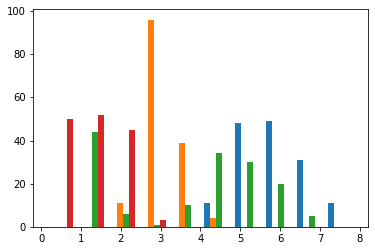

In [53]:
#Visualize data:
import numpy as np 
import matplotlib.pyplot as plt 

plt.hist(iris['data'])
plt.show()

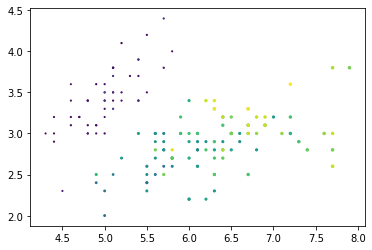

In [54]:
#Visualize data:
plt.scatter(iris.data[:,0], iris.data[:,1], iris.data[:,2], iris.data[:,3])

In [65]:
#Perform PCA on two major components:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_trans = pca.fit_transform(iris.data)


Only X input data needs to be transformed (i.e. dimensions reduced), output data y doesn't need to be transformed.

In [66]:
#Split into training and testing data set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_trans, iris['target'], test_size=0.3)

In [67]:
#train K-Nearest-Neighbor Algorithm for classification:

from sklearn.neighbors import KNeighborsClassifier as KNN 

model = KNN(n_neighbors=3)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

In [77]:
#prediction with new data point:

X_new = np.array([[2.83, 3.15, 3.99, 0.01],
                  [0.79, 2.89, 3.73, 1.53],
                  [0.42, 1.75, 3.71, 1.23],
                  [1.46, 3.23, 2.35, 0.91]])


X_new_trans = pca.transform(X_new)

y_new = model.predict(X_new_trans)

y_new

array([1, 1, 1, 0])

In [78]:
def visualize(model, X, y, X_new=None, y_new=None):
    # create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # save the decision boundary of the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # add some random noise to the data for plotting purposes only so thatoverlapping point can be identified.
    noise = np.random.normal(0, 0.02, X.shape)
    X = X + noise

    # create a custom colormap that maps a specific color to each flowerclass
    cmap = plt.cm.coolwarm
    colors = cmap(np.linspace(0, 1, 3, endpoint=True))

    # set the size of the figure
    plt.rcParams["figure.figsize"] = (10, 6)

    # plot the decision boundary of the model in color code
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

    # plot the data points for each flower class
    for i_class in np.unique(y):
        plt.scatter(X[:, 0][y == i_class], X[:, 1][y == i_class],s=64, c=np.atleast_2d(colors[i_class]), edgecolor='k',cmap=plt.cm.coolwarm, alpha=0.7,label=iris['target_names'][i_class])

    if X_new is not None and y_new is not None:
        for i_class in np.unique(y_new):
            plt.scatter(X_new[:, 0][y_new == i_class], X_new[:, 1][y_new == i_class], marker='^', s=96, c=np.atleast_2d(colors[i_class]), edgecolor='k', cmap=plt.cm.coolwarm, alpha=0.7)

    # set plotting parameters such as axis labels, ranges,a title and the legend.

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('KNN Classification')
    plt.legend()

    #show the plot
    plt.show()

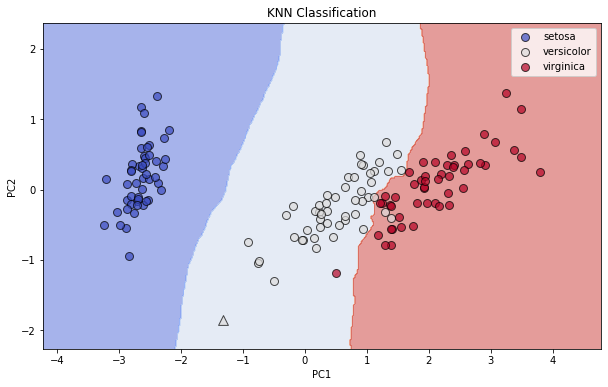

In [80]:
visualize(model, iris_trans, iris['target'], X_new_trans, y_new)